In [14]:
import numpy as np   
# 배열 및 수학적 계산을 위한 NumPy 라이브러리 불러오기
import pandas as pd  
# 데이터 처리 및 분석을 위한 Pandas 라이브러리 불러오기
from tensorflow.keras.models import Sequential  
# 순차적인 모델 생성을 위한 Keras 모듈
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input 
# LSTM 계층과 Dense 계층을 가져오기 위한 Keras 모듈
from sklearn.preprocessing import MinMaxScaler  
# 데이터 스케일링을 위한 MinMaxScaler 불러오기
from sklearn.model_selection import train_test_split 
# 데이터를 훈련과 테스트용으로 나누기 위한 모듈
import matplotlib.pyplot as plt  
# 학습 과정 시각화를 위한 Matplotlib 라이브러리 불러오기
from sklearn.metrics import mean_squared_error  
# 모델 성능 평가를 위한 평균 제곱 오차(MSE) 계산 모듈 불러오기

In [15]:
# 데이터 로드 및 전처리 과정 
X_data = pd.read_csv(r'D:\MusicTrendAnalysis\data\X_data.csv')
# X 데이터 (피처들)를 CSV 파일에서 로드
y_data = pd.read_csv(r'D:\MusicTrendAnalysis\data\y_data.csv')
# y 데이터 (타겟 값)을 CSV 파일에서 로드

In [16]:
scaler = MinMaxScaler()  
# 데이터를 0과 1 사이로 스케일링하기 위한 MinMaxScaler 객체 생성

X_scaled = scaler.fit_transform(X_data)  
# X 데이터를 0과 1 사이로 정규화

In [17]:
time_steps = 5  # LSTM에서 사용할 타임스텝 설정
X_lstm, y_lstm = [], []  # 빈 리스트 생성 (시계열 데이터 저장용)

for i in range(len(X_scaled) - time_steps):  
    # 시계열 데이터를 만들기 위해 루프를 실행
    X_lstm.append(X_scaled[i:i + time_steps, :])  
    # 각 시퀀스의 입력 데이터 추가
    y_lstm.append(y_data.iloc[i + time_steps].values)  
    # 해당 시퀀스의 타겟 값 추가

X_lstm = np.array(X_lstm)  # 리스트를 NumPy 배열로 변환 (모델 입력용)
y_lstm = np.array(y_lstm)  # 리스트를 NumPy 배열로 변환 (모델 출력용)

# 데이터를 훈련과 테스트용으로 나누기 (8:2 비율로 분할)
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

In [18]:
# 충분한 계층을 가진 LSTM 모델 정의
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Input 레이어로 입력 형상 지정
model.add(LSTM(units=100, return_sequences=True))  # 첫 번째 LSTM 계층 (모든 시퀀스 반환)
model.add(Dropout(0.2))  # 과적합 방지를 위한 Dropout 계층 추가
model.add(LSTM(units=100, return_sequences=True))  # 두 번째 LSTM 계층 (모든 시퀀스 반환)
model.add(Dropout(0.2))  # Dropout 계층 추가
model.add(LSTM(units=50))  # 세 번째 LSTM 계층 (마지막 시퀀스 반환)
model.add(Dense(2))  # 출력층 (출력값의 차원이 2이므로 2개의 뉴런)


In [19]:
# 모델 컴파일 (손실 함수: 평균 제곱 오차, 옵티마이저: Adam)
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# 모델 구조 출력
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 5, 100)         │        54,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 5, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,102 (644.93 KB)

 Trainable params: 165,102 (644.93 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# 모델 학습 (훈련 데이터와 검증 데이터를 사용하여 모델 학습)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 16337170.0000 - val_loss: 15553658.0000
Epoch 2/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 16384093.0000 - val_loss: 15490989.0000
Epoch 3/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 15926874.0000 - val_loss: 15429442.0000
Epoch 4/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 16206143.0000 - val_loss: 15368747.0000
Epoch 5/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 15789796.0000 - val_loss: 15308544.0000
Epoch 6/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 16247455.0000 - val_loss: 15248808.0000
Epoch 7/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 15887659.0000 - val_loss: 15189617.0000
Epoch 8/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 16128562.0000 - val_loss: 15130512.0000
Epoch 9/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 15657870.0000 - val_loss: 15071750.0000
Epoch 10/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 15823024.0000 - val_loss: 15013253.000

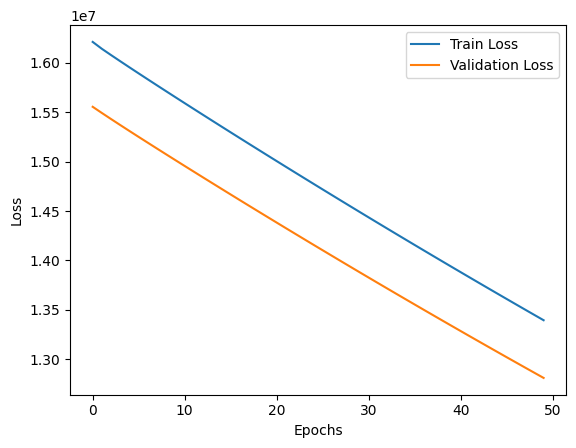

In [22]:
# 학습 손실 시각화 (훈련 손실과 검증 손실을 그래프로 표시)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
# 테스트 데이터 예측 및 평가
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Mean Squared Error: 12811323.013365928


train loss 와 validation loss가 점차 감소하는 그래프
- 모델이 학습을 통해 점차 더 나은 예측을 하고 있음을 보여주고 있음

trian loss가 validation loss보다 약간 높은 위치에 있는데
- 이는 모델이 훈련 데이터에 대해 더 잘 학습하고, 검증 데이터에도 좋은 일반화 성능을 가지고 있음을 의미한다. 
다만 두 손실이 점점 줄어드는 추세를 보이는 것은 학습이 잘 이루어지고 있다는 긍정적인 신호이다.

# 테스트 데이터 예측 결과 
mse : 평균제곱오차
평균 제곱 오차는 예측 값과 실제 값의 차이를 제곱하여 평균을 낸 값이다.
현재 mse 값이 비교적 큰 편인것으로 보인다. 
이는 모델이 정확한 예측을 하기에는 아직 부족한적임 있을수있는다는것을 의미하는바

개선방안으로는 
1. 하이퍼파라미터 조정
2. 더 많은 에포크
3. 데이터 정규화 및 전처리
4. 모델 구조 변경
5. 조기 종료 : 학습 중 검증 손실이 더 이상 감소하지 않으면 학습을 자동으로 멈추는 조기 종료 기법을 사용함으로써 과적합을 방지할 수 있다.
